# **LinkedIn Job Recommendation Engine**

## **Objective**

To build a supervised machine learning model to predict suitable job roles for LinkedIn users based on their profiles.

## **1. Importing Libraries**

**Theory:**

We use the following libraries:
- `pandas`: For data manipulation.
- `matplotlib.pyplot` and `seaborn`: For data visualization.
- `sklearn`: For machine learning modeling and evaluation.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## **2. Loading the Dataset**

**Theory:**

Load the dataset and inspect its structure to understand the available data and identify potential issues.

In [ ]:
# Load the dataset
file_name = "linkedin_job_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
     User ID  Years of Experience           Skills Education Level   Industry  \
0  USER00001                    8              SQL      Bachelor's     Retail   
1  USER00002                   16             Java        Master's         IT   
2  USER00003                    8  Web Development      Bachelor's    Finance   
3  USER00004                    1           Python      Bachelor's  Education   
4  USER00005                   17              SQL        Master's    Finance   

  Preferred Job Role Recommended Job Role  
0       Data Analyst        Web Developer  
1    Project Manager      Project Manager  
2   System Architect    Software Engineer  
3       Data Analyst        Web Developer  
4   System Architect         Data Analyst  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0  

## **3. Data Cleaning and Preprocessing**

**Theory:**

Data cleaning involves:
- Handling null values.
- Encoding categorical variables.
- Splitting the data into features (`X`) and target (`y`).

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ["Skills", "Education Level", "Industry", "Preferred Job Role", "Recommended Job Role"]
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=["User ID", "Recommended Job Role"])
y = df["Recommended Job Role"]

# Display cleaned data
print("\nCleaned Data Sample:")
print(df.head())


Missing Values:
User ID                 0
Years of Experience     0
Skills                  0
Education Level         0
Industry                0
Preferred Job Role      0
Recommended Job Role    0
dtype: int64

Cleaned Data Sample:
     User ID  Years of Experience  Skills  Education Level  Industry  \
0  USER00001                    8       5                0         4   
1  USER00002                   16       2                2         3   
2  USER00003                    8       6                0         1   
3  USER00004                    1       4                0         0   
4  USER00005                   17       5                2         1   

   Preferred Job Role  Recommended Job Role  
0                   0                     4  
1                   1                     1  
2                   3                     2  
3                   0                     4  
4                   3                     0  


## **4. Exploratory Data Analysis (EDA)**

### **4.1 Distribution of Recommended Job Roles**

**Theory:**

Visualizing the distribution of job roles provides insight into the dataset's target variable.

/tmp/ipython-input-504765848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


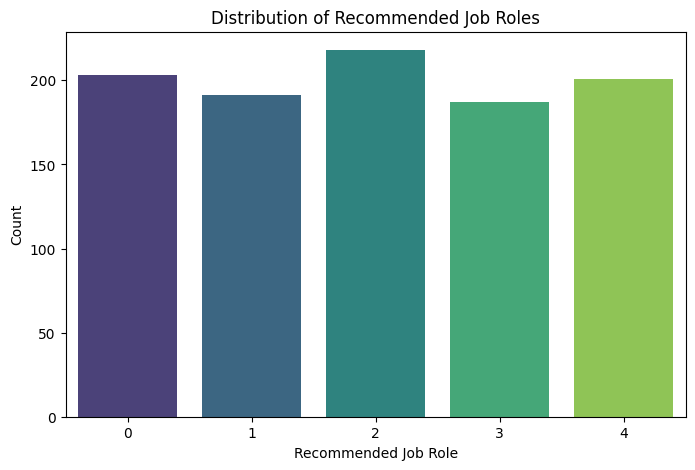

In [ ]:
# Plot the distribution of recommended job roles
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Recommended Job Roles")
plt.xlabel("Recommended Job Role")
plt.ylabel("Count")
plt.show()

### **4.2 Years of Experience vs. Recommended Job Role**

**Theory:**

Analyzing how experience impacts the recommendation of job roles helps validate the model.

In [ ]:
# Box plot for years of experience by recommended job role
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df["Years of Experience"], palette="coolwarm")
plt.title("Years of Experience by Recommended Job Role")
plt.xlabel("Recommended Job Role")
plt.ylabel("Years of Experience")
plt.show()

## **5. Splitting Data for Modeling**

**Theory:**

Split the data into training and testing sets to evaluate the model’s performance.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (800, 5)
Testing Set: (200, 5)


## **6. Model Training and Evaluation**

### **6.1 Random Forest Classifier**

**Theory:**

Random Forest is a robust classifier for multi-class problems.

In [ ]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        37
           1       0.22      0.21      0.22        42
           2       0.23      0.31      0.26        39
           3       0.13      0.14      0.14        35
           4       0.12      0.06      0.08        47

    accuracy                           0.19       200
   macro avg       0.18      0.19      0.18       200
weighted avg       0.18      0.19      0.18       200


Confusion Matrix:
[[ 9  9  7  7  5]
 [ 8  9 12  8  5]
 [ 6  4 12 11  6]
 [10  6  9  5  5]
 [11 13 12  8  3]]


### **6.2 Feature Importance**

**Theory:**

Understanding which features are most important helps in improving model interpretability.


Feature Importance:
               Feature  Importance
0  Years of Experience    0.352668
1               Skills    0.207642
4   Preferred Job Role    0.173969
3             Industry    0.160068
2      Education Level    0.105654


/tmp/ipython-input-3565314275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="magma")


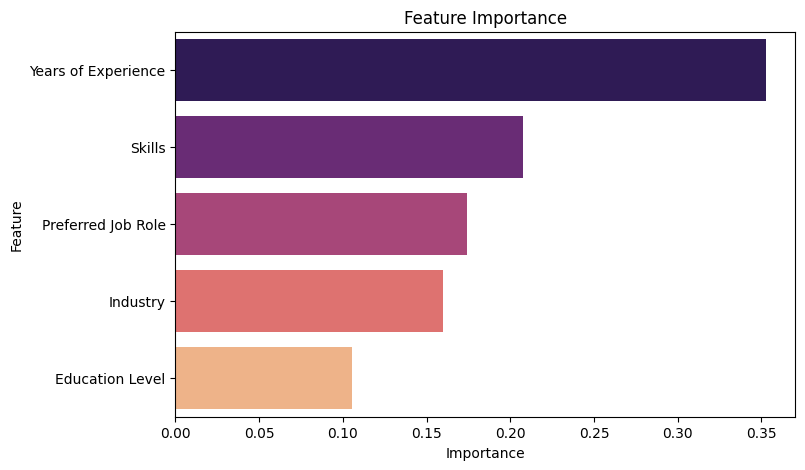

In [ ]:
# Display feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="magma")
plt.title("Feature Importance")
plt.show()

## **7. Visualizing Predictions**

**Theory:**

Compare the actual and predicted job roles using a confusion matrix.

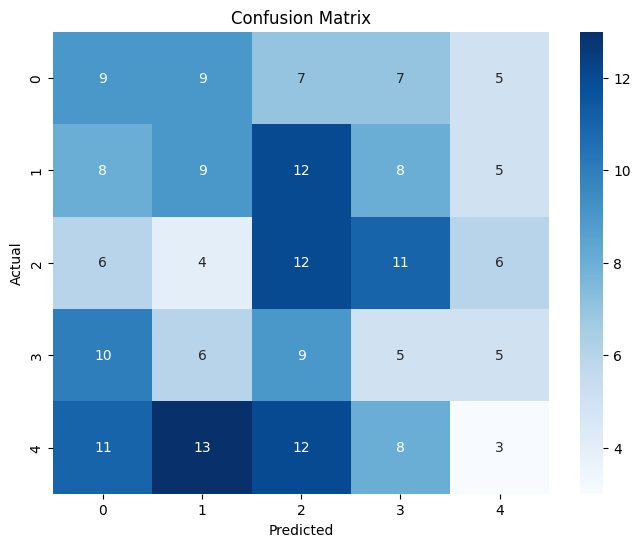

In [ ]:
# Heatmap for confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **8. Saving the Model**

**Theory:**

Save the trained model for future use.

In [ ]:
# Save the model
import joblib

model_filename = "linkedin_job_recommendation_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as linkedin_job_recommendation_model.pkl
